In [1]:
import os
import datetime
import dateutil
import tarfile
import requests
import pandas as pd
import pandas.io.sql as sqlio

%matplotlib inline

In [2]:
os.listdir('../boursorama/2023')[:5]

['compB 2023-11-21 10:12:01.914574.bz2',
 'amsterdam 2023-01-23 16:42:01.777744.bz2',
 'compA 2023-04-10 09:12:01.301255.bz2',
 'compA 2023-07-12 11:42:01.793751.bz2',
 'peapme 2023-01-25 16:12:01.637978.bz2']

In [3]:
df = pd.read_pickle('../boursorama/2023/compB 2023-11-21 10:12:01.914574.bz2') # read_pickle to read Pandas DataFrames

In [4]:
df.head()

,last,volume,symbol,name
symbol,,,,
1rPAB,2.885,56246,1rPAB,SRDAB SCIENCE
1rPABCA,4.980,6675,1rPABCA,SRDABC ARBITRAGE
1rPABVX,10.240,1907,1rPABVX,ABIVAX
1rPABLD,9.700(c),0,1rPABLD,ABL DIAGNOSTICS
1rPAAC,9.950(c),0,1rPAAC,ACCOR ACQ COM


In [54]:

import glob
def collecte_df(directory_path:str="../boursorama/2023/", market_name:str="compA") ->pd.DataFrame:
    dfglob = glob.glob1(directory_path, market_name + "*")
    files_path = [directory_path + file for file in dfglob]
    df = pd.concat({dateutil.parser.parse(f.split(market_name)[1].split(".bz2")[0]):pd.read_pickle(f) for f in files_path})
    return df
def convertion(x):
    try:
        
        return float(x)
    except:
        return float(x.replace(' ',''))

def firstFiltering(df, year:str = "2023"):
    df["last"] = [str(x).split("(c)")[0] for x in df["last"]]
    df["last"] = [str(x).split("(s)")[0] for x in df["last"]]
    df['last'] = df['last'].apply(convertion)
    # on retire l'index qui commence par les noms d'entreprises pour finir par leur symbole
    df = df.reset_index(level=1, drop=True)
    df = df.dropna()
    # on nome l'index des date puis on passe la colonne des symboles en index
    df = df.rename_axis('date', axis=0)
    # on retire les jours de congés dont les données ne devraient pas exister
    df.sort_index(inplace=True)
    day_off = [year+'-01-01', year+'-03-30', year+'-04-02', year+'-05-01', year+'-12-25', year+'-12-26']
    for d in day_off:
        if d in df.index:
            df.drop(df.loc[d].index, inplace=True )
    # on passe la colonne des symboles en index et on la met en premier
    #df = df.set_index('symbol', append=True)
    #df = df.swaplevel(0,1).sort_index()
    return df
    

In [55]:
compA = collecte_df(market_name="compA")

In [56]:
compA = firstFiltering(compA, year="2023")

In [57]:
compA

,last,volume,symbol,name
date,,,,
2023-01-02 09:02:01.941047,5.245,12174,1rPBOL,SRDBOLLORE SE
2023-01-02 09:02:01.941047,9.800,14,1rPBLV,BELIEVE
2023-01-02 09:02:01.941047,14.340,394,1rPBEN,SRDBENETEAU
2023-01-02 09:02:01.941047,0.660,0,1rPBNS,BENI STABILI SIIQ
2023-01-02 09:02:01.941047,64.000,1179,1rPBB,SRDBIC
...,...,...,...,...
2023-12-29 17:52:01.887807,10.294,1057490,1rPORA,SRDORANGE
2023-12-29 17:52:01.887807,0.000,0,1rPFTENV,ORANGE E14
2023-12-29 17:52:01.887807,62.010,0,1rPORPNV,ORPEA I15


In [58]:
import numpy as np
axa = compA[compA["name"] == "AXA"]
axa.head()

,last,volume,symbol,name
date,,,,
2023-01-04 09:02:02.203260,23.5,0,1rPCSNV,AXA
2023-01-04 09:12:01.494111,23.5,0,1rPCSNV,AXA
2023-01-04 09:22:01.845321,23.5,0,1rPCSNV,AXA
2023-01-04 09:32:01.823947,23.5,0,1rPCSNV,AXA
2023-01-04 09:42:02.275829,23.5,0,1rPCSNV,AXA


In [59]:
#axa["last"] = axa["last"].astype("float")
print("moyenne des cours d'AXA: ",np.mean(axa["last"]))

moyenne des cours d'AXA:  27.19971588188348


<Axes: xlabel='date'>

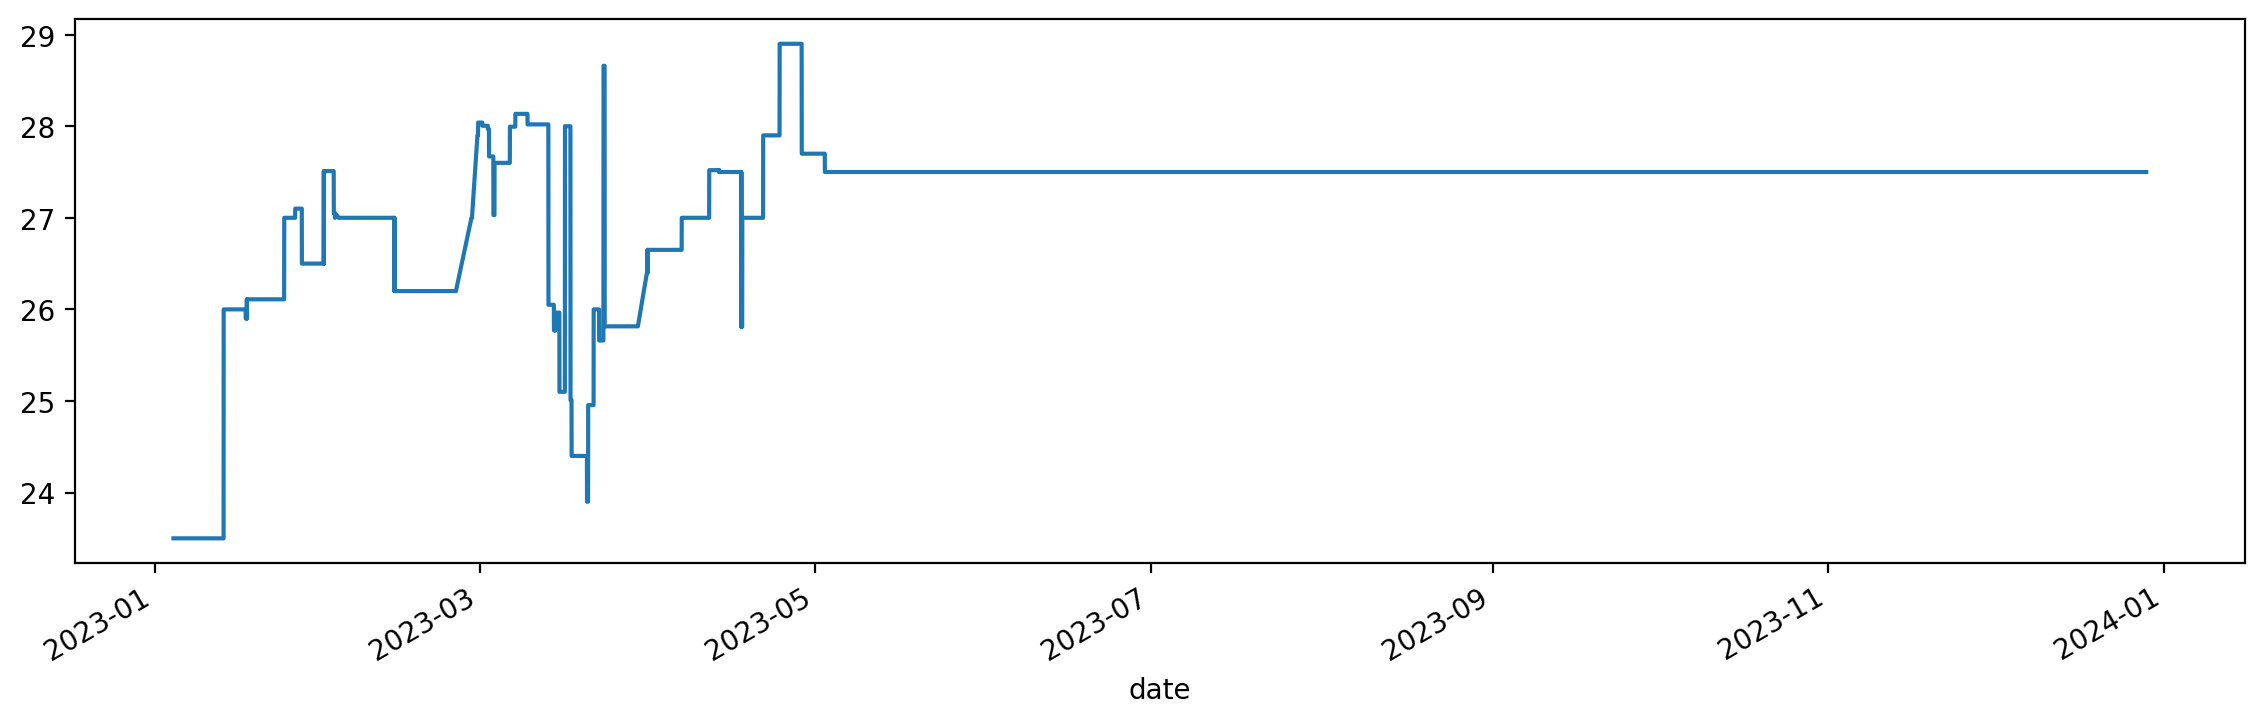

In [60]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Tracer les données
axa['last'].plot(figsize=(14,4))

<Axes: xlabel='date'>

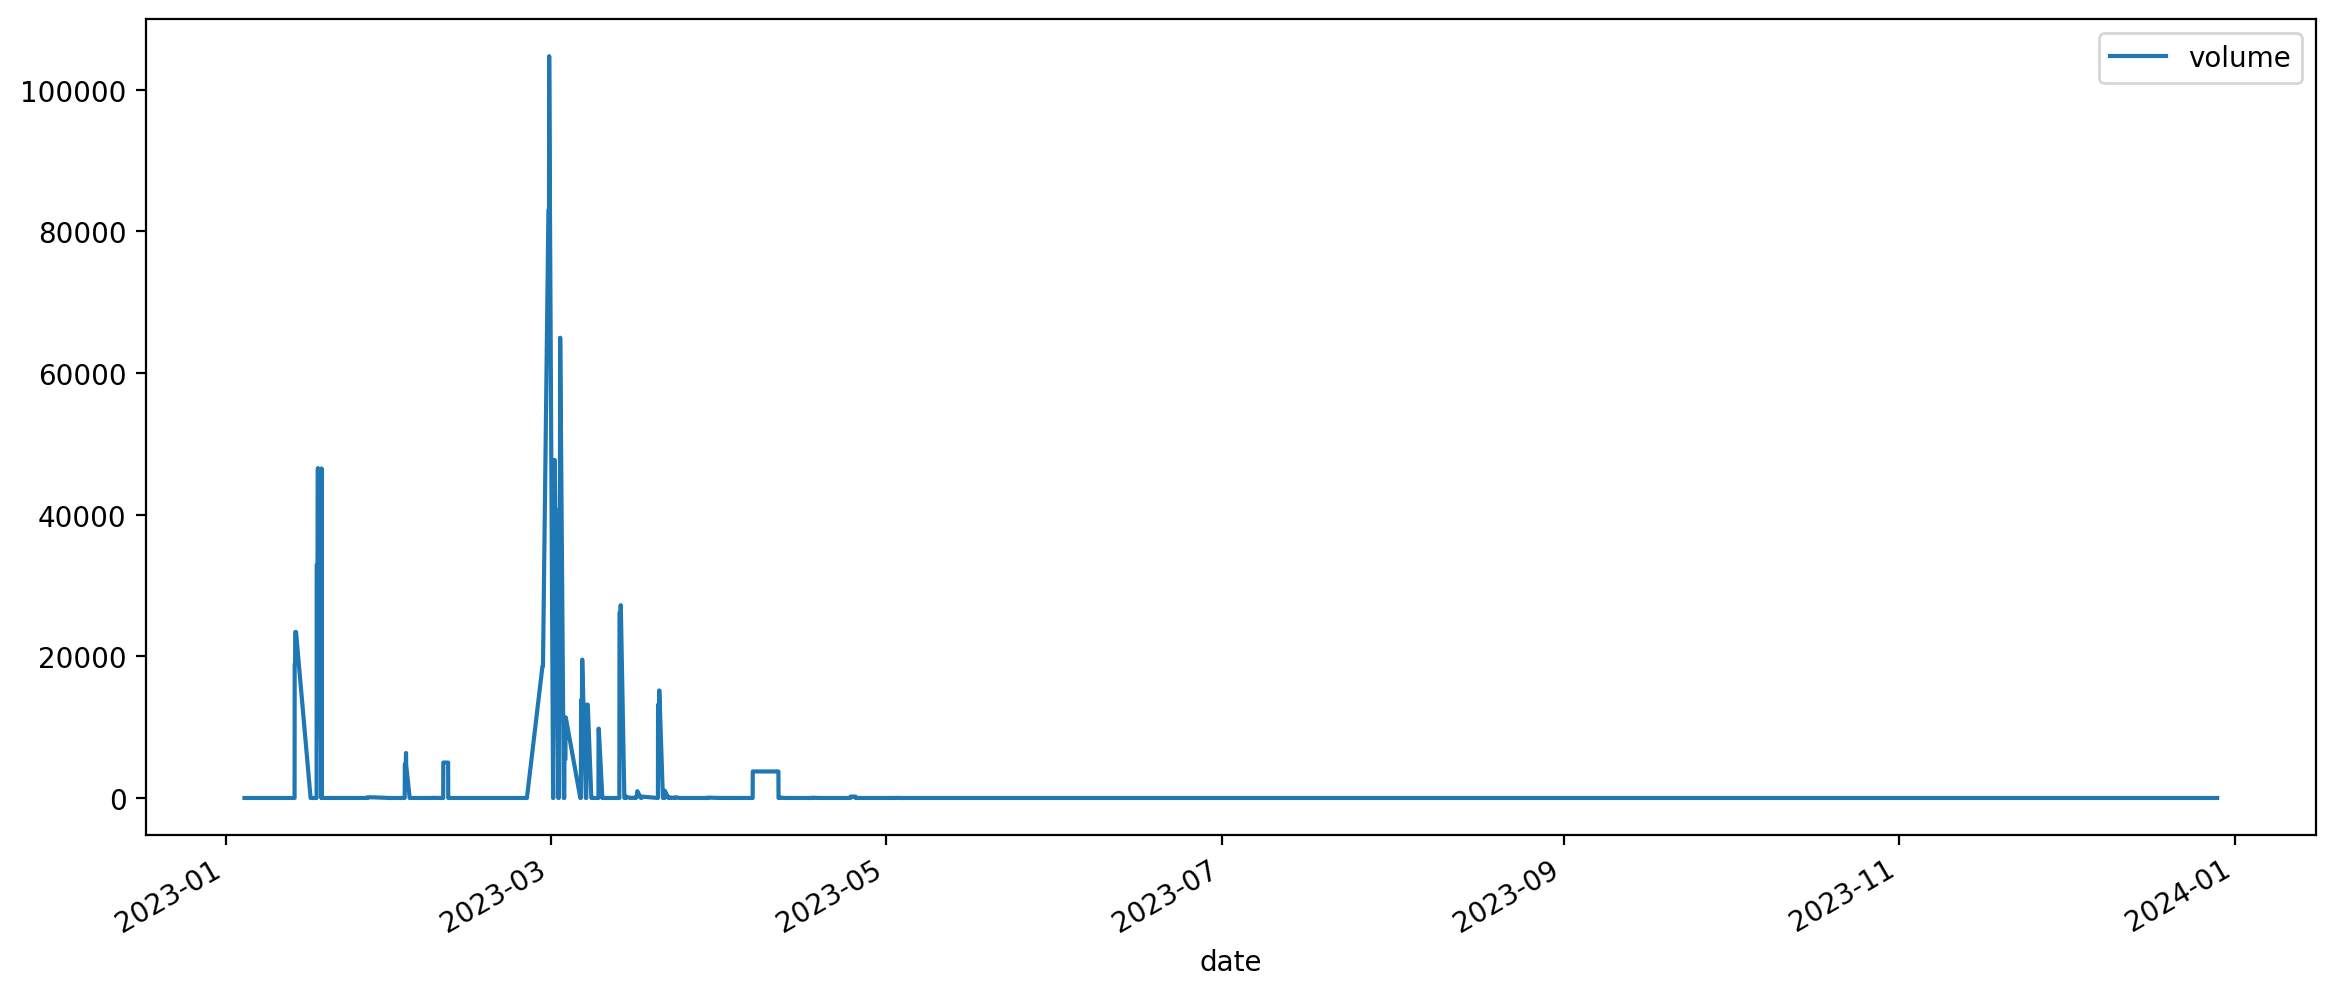

In [61]:
axa.plot(y="volume",  figsize=(14, 6))

<Axes: xlabel='date'>

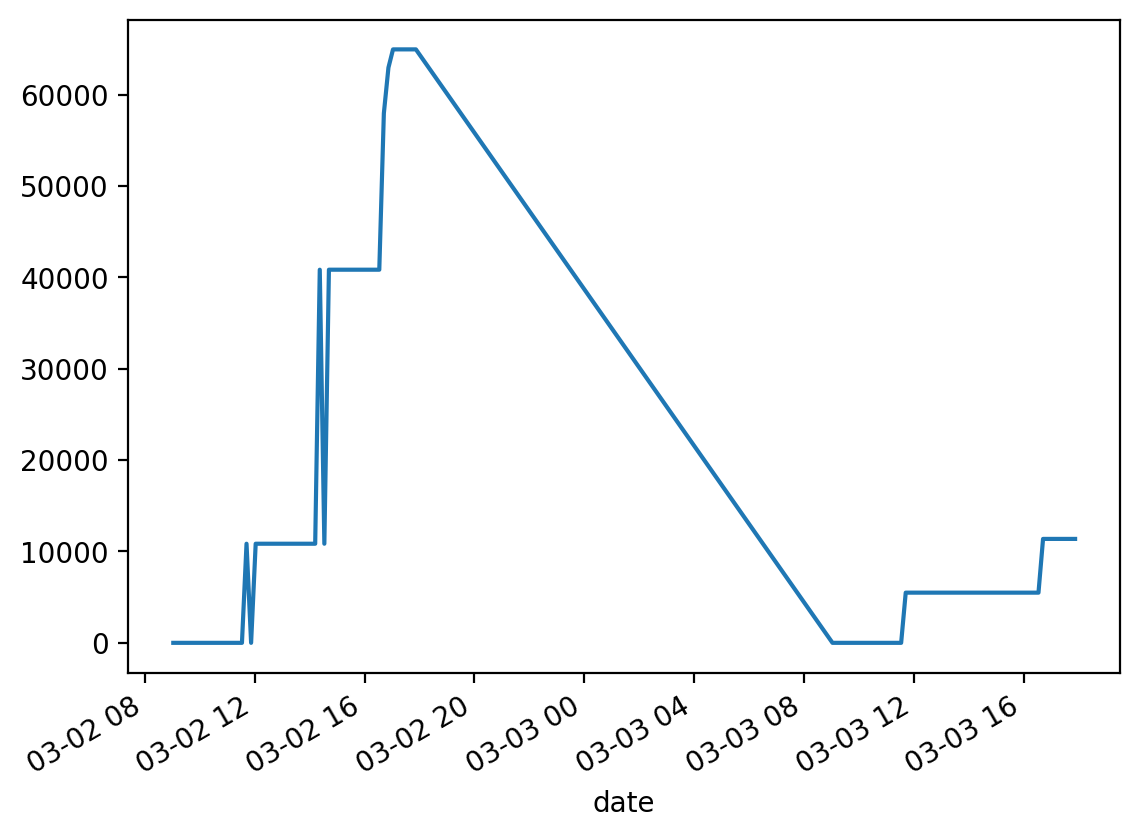

In [62]:
axa.loc["2023-03-02": "2023-03-03", "volume"].plot()

<Axes: xlabel='date'>

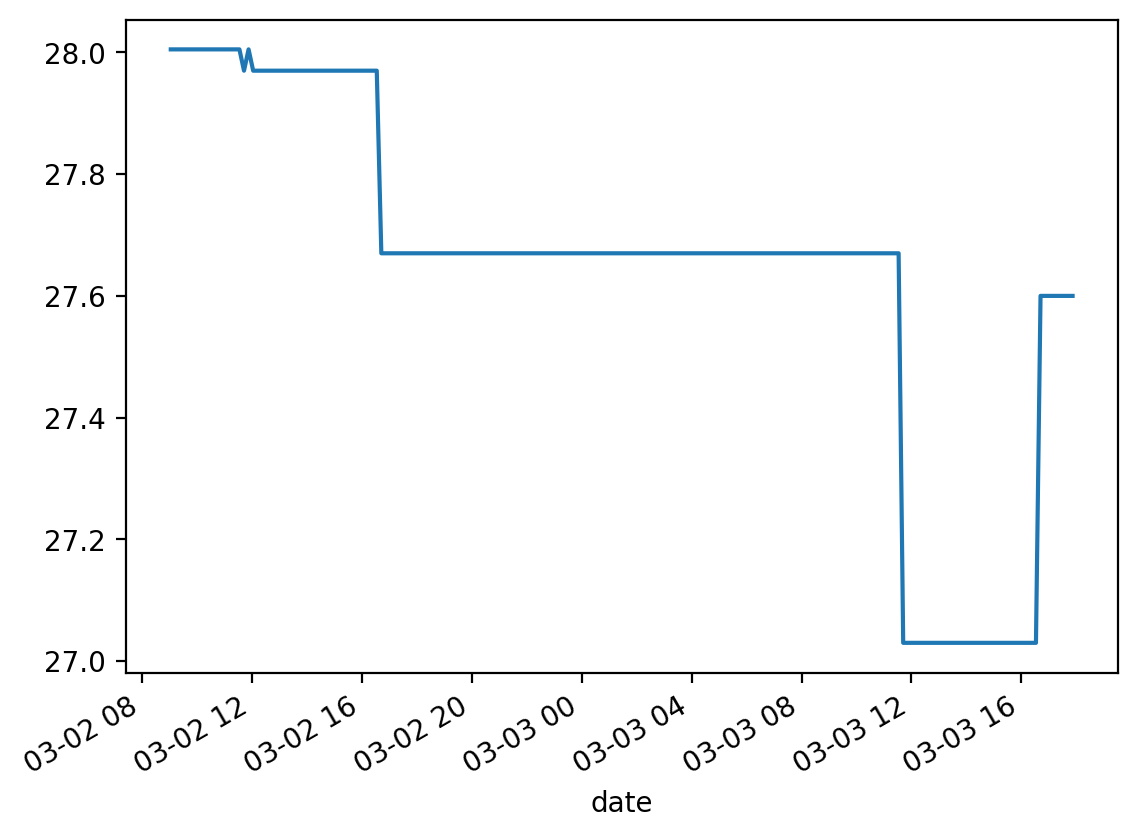

In [63]:
axa.loc["2023-03-02": "2023-03-03", "last"].plot()

In [64]:
axa.sort_index(inplace=True)
axa.loc["2023-03-02": "2023-03-03", "volume"]

date
2023-03-02 09:02:02.156611        0
2023-03-02 09:12:01.487764        0
2023-03-02 09:22:01.911275        0
2023-03-02 09:32:02.134285        0
2023-03-02 09:42:01.725008        0
                              ...  
2023-03-03 17:12:02.157229    11378
2023-03-03 17:22:01.323036    11378
2023-03-03 17:32:01.441334    11378
2023-03-03 17:42:01.505521    11378
2023-03-03 17:52:02.026347    11378
Name: volume, Length: 108, dtype: int64

Conclusion: les volumes et les prix des cours sont cohérents car ils ont la meme monotonie

In [65]:
axa.head()

,last,volume,symbol,name
date,,,,
2023-01-04 09:02:02.203260,23.5,0,1rPCSNV,AXA
2023-01-04 09:12:01.494111,23.5,0,1rPCSNV,AXA
2023-01-04 09:22:01.845321,23.5,0,1rPCSNV,AXA
2023-01-04 09:32:01.823947,23.5,0,1rPCSNV,AXA
2023-01-04 09:42:02.275829,23.5,0,1rPCSNV,AXA


Reproduisons cela pour toutes les actions

Supprimons Les jours off

In [66]:
# Vérifions que la courbe d'AXA est toujours la même
compA.loc['1rPCS','last'].plot(figsize=(14,4))

KeyError: '1rPCS'

In [51]:
print("masse monetaire avant: ", (compA["volume"] * compA["last"]).sum())

masse monetaire avant:  13422093916984.098


In [55]:
compB = collecte_df(market_name="compB")

Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcent

In [56]:
compB 

,last,volume,symbol,name
2023-11-21 10:12:01.914574,2.885,56246,1rPAB,SRDAB SCIENCE
2023-11-21 10:12:01.914574,4.980,6675,1rPABCA,SRDABC ARBITRAGE
2023-11-21 10:12:01.914574,10.240,1907,1rPABVX,ABIVAX
2023-11-21 10:12:01.914574,9.700(c),0,1rPABLD,ABL DIAGNOSTICS
2023-11-21 10:12:01.914574,9.950(c),0,1rPAAC,ACCOR ACQ COM
...,...,...,...,...
2023-08-31 10:12:01.376451,0.001,0,1rPVRADS,VRANKEN-POMMERY DS
2023-08-31 10:12:01.376451,28.800,579,1rPWAGA,WAGA ENERGY
2023-08-31 10:12:01.376451,54.200,1076,1rPWAVE,SRDWAVESTONE
2023-08-31 10:12:01.376451,10.460,5898,1rPXFAB,X-FAB SILICON


In [58]:
compB.groupby(by="name").mean()

/var/folders/gq/smvy125s6gvg8fmg2wlp7flc0000gn/T/ipykernel_18004/2295296480.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  compB.groupby(by="name").mean()


,volume
name,
AB SCIENCE,39484.584507
ABC ARBITRAGE,20126.746479
ABIVAX,20024.945646
ABL DIAGNOSTICS,14.624157
ACCOR ACQ COM,3387.626192
...,...
VRANKEN-POMMERY MO.,0.000000
WAGA ENERGY,1614.180849
WAVESTONE,2192.258741


In [60]:
abivax = compB[compB["name"] == "ABIVAX"]
abivax.head(10)

,last,volume,symbol,name
2023-11-21 10:12:01.914574,10.240,1907,1rPABVX,ABIVAX
2023-07-24 16:02:01.322937,17.200,25288,1rPABVX,ABIVAX
2023-07-19 17:42:01.885062,16.540,25671,1rPABVX,ABIVAX
2023-04-03 11:12:02.095625,7.250,5930,1rPABVX,ABIVAX
2023-03-30 11:32:02.022350,7.040,30113,1rPABVX,ABIVAX
2023-05-15 10:32:01.528204,19.440,71501,1rPABVX,ABIVAX
2023-11-02 09:22:01.917627,9.000,14626,1rPABVX,ABIVAX
2023-01-09 16:02:01.489822,7.060,20975,1rPABVX,ABIVAX
2023-06-28 10:22:01.573451,15.420,486,1rPABVX,ABIVAX
2023-06-16 09:32:01.784458,15.820,5038,1rPABVX,ABIVAX


In [62]:
abivax["last"] = [x.split("(c)")[0] for x in abivax["last"]]
abivax["last"] = [x.split("(s)")[0] for x in abivax["last"]]
abivax["last"] = abivax["last"].astype("float")
print("moyenne des cours d'ABIVAX: ",np.mean(abivax["last"]))

AttributeError: 'float' object has no attribute 'split'

<Axes: >

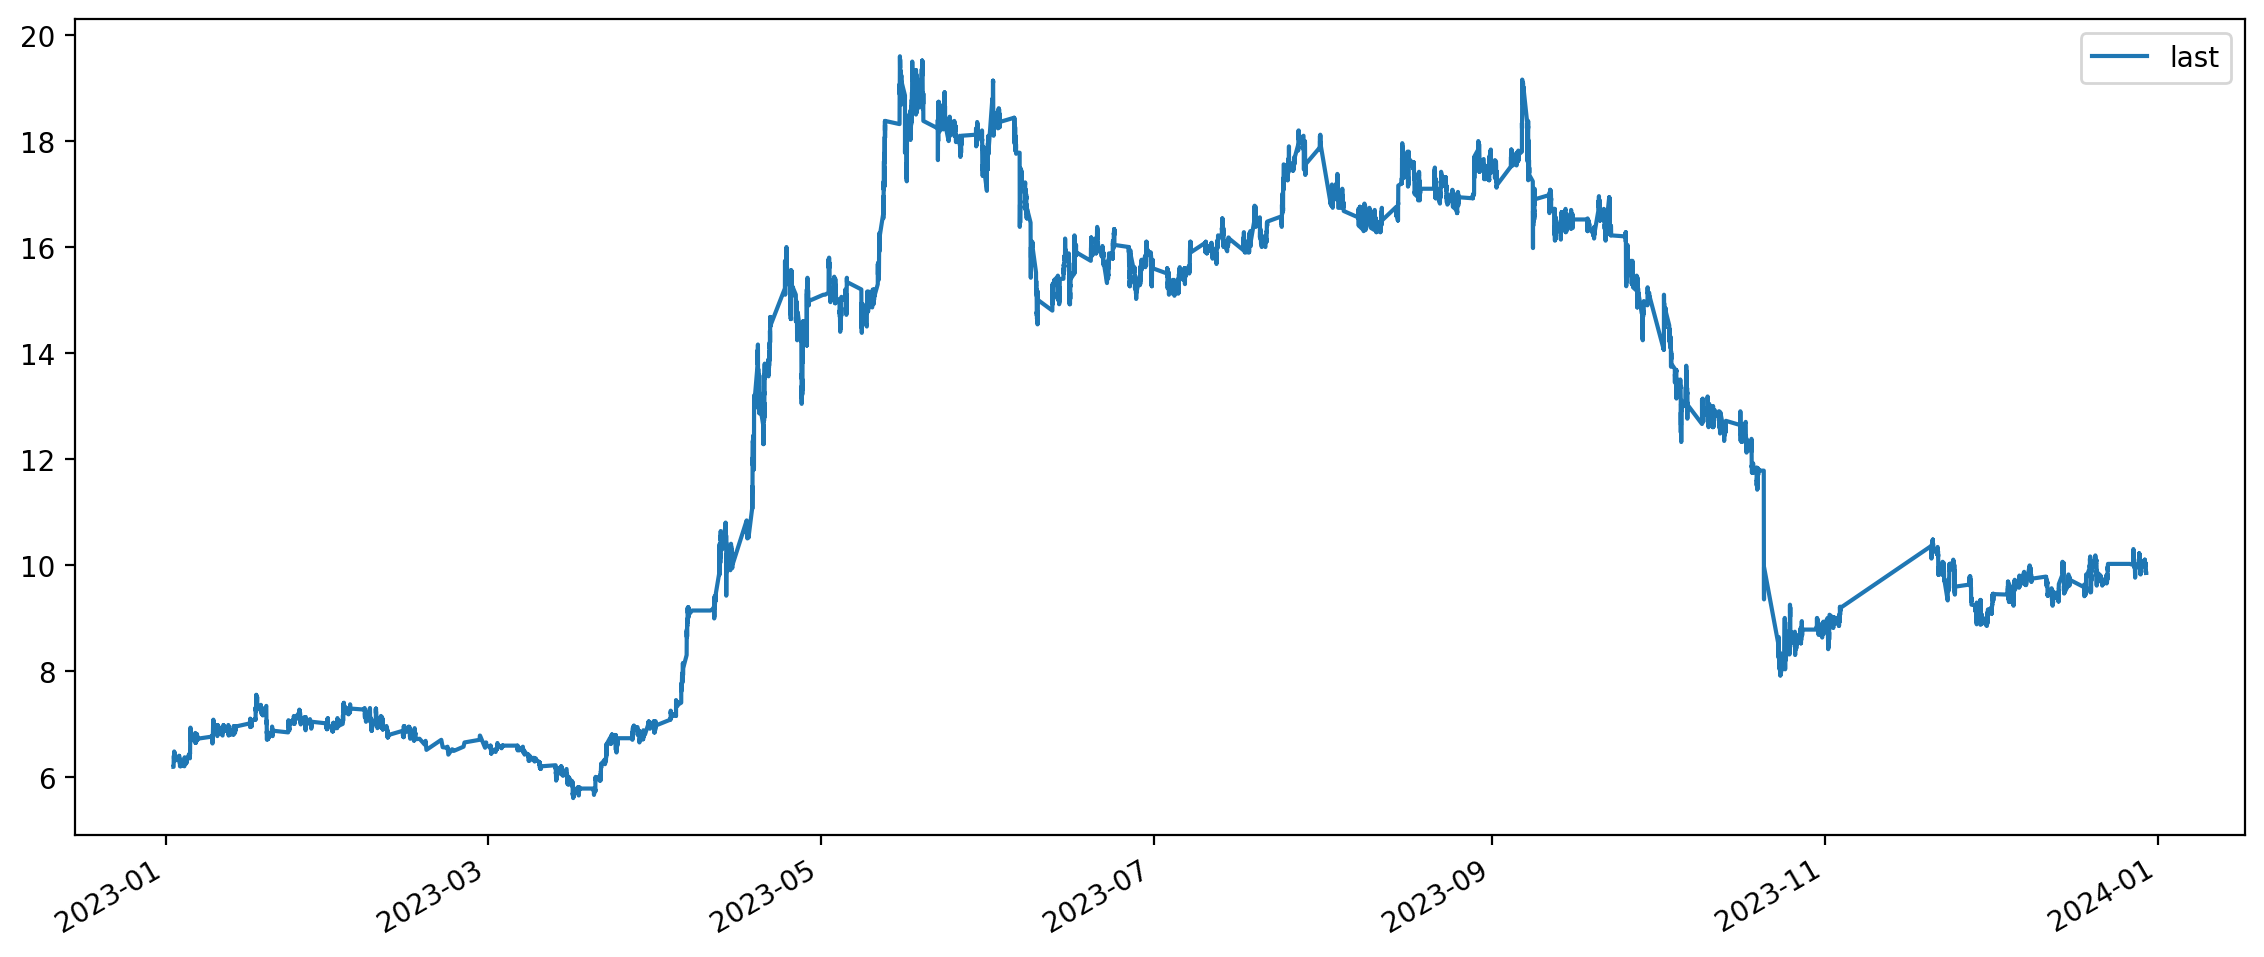

In [63]:
# Tracer les données
abivax.plot( y="last", figsize=(14, 6))

<Axes: >

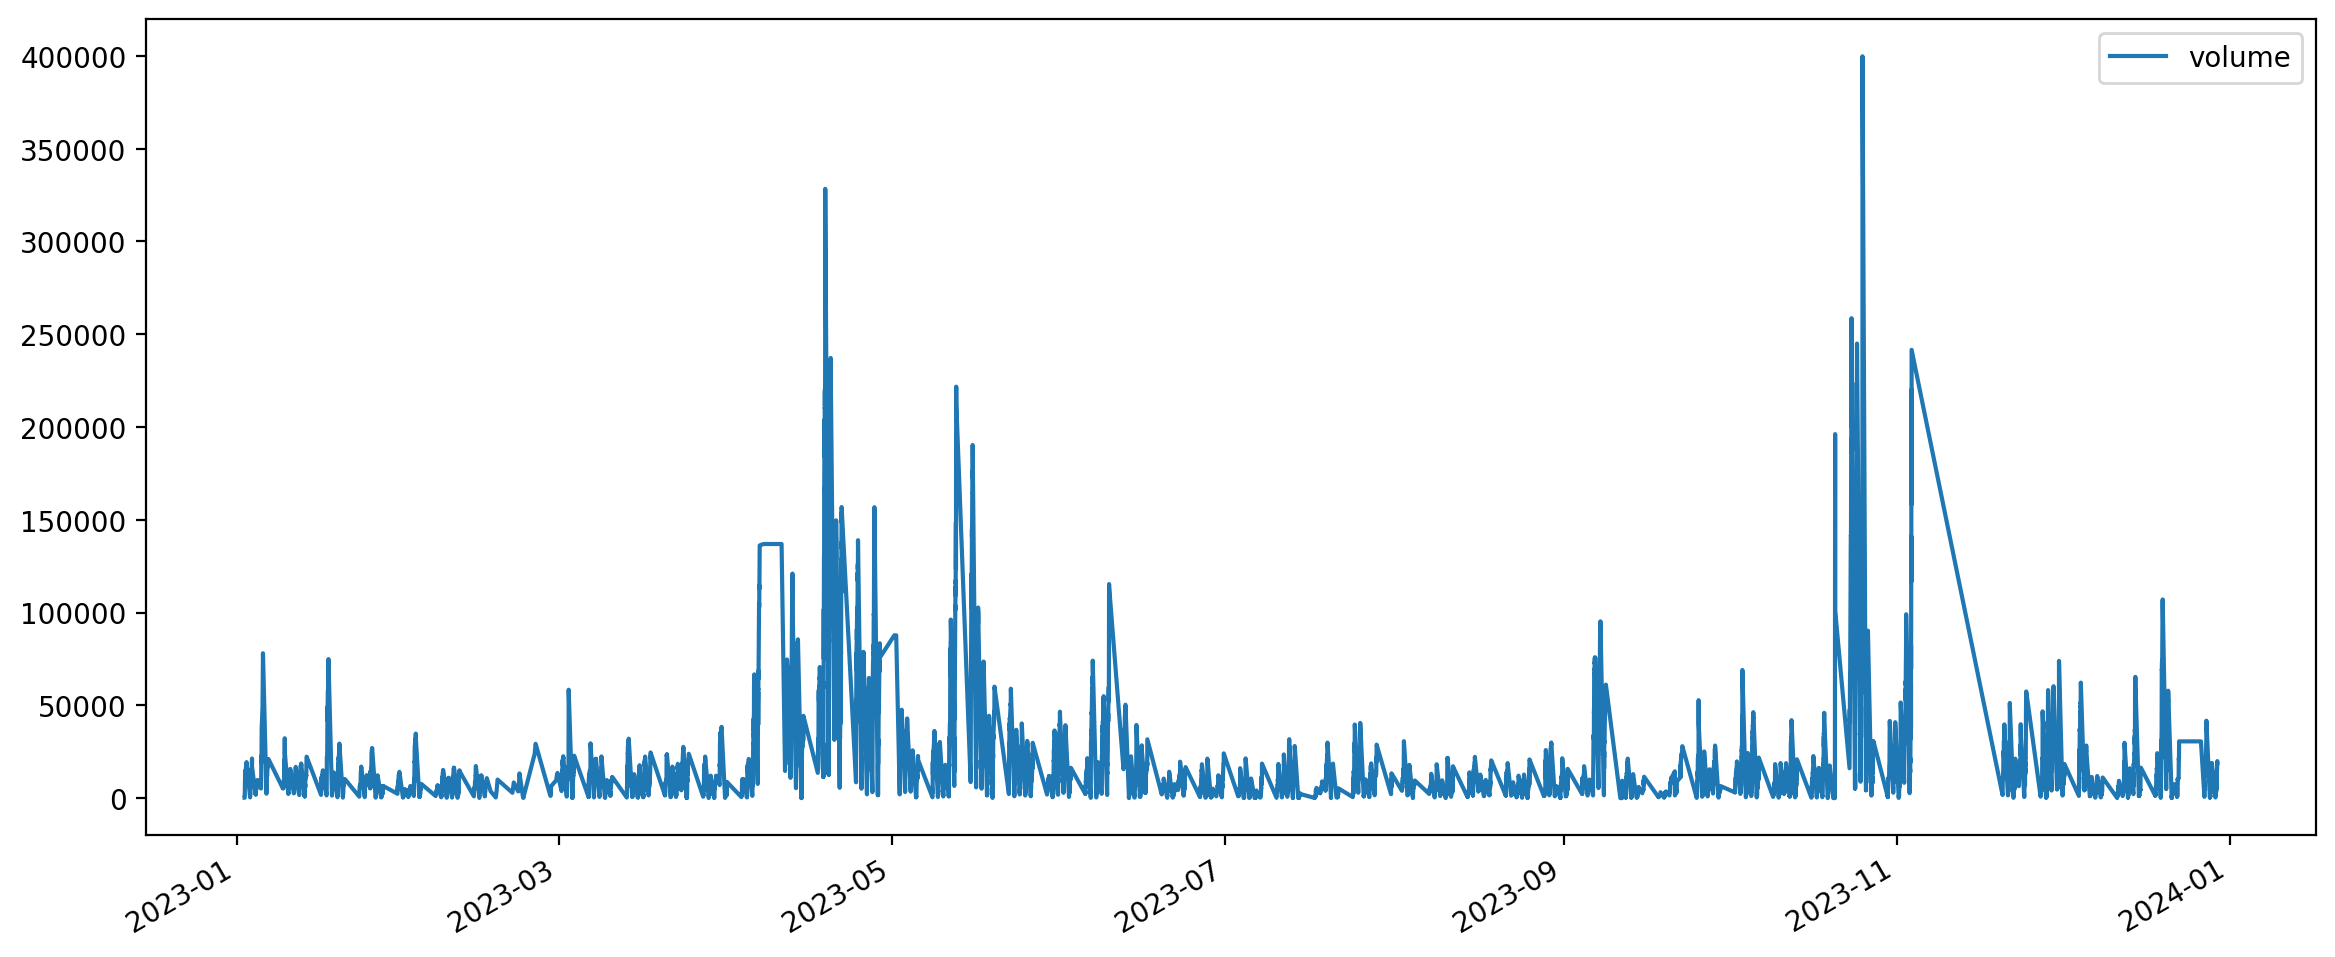

In [64]:
abivax.plot(y="volume",  figsize=(14, 6))

/var/folders/gq/smvy125s6gvg8fmg2wlp7flc0000gn/T/ipykernel_18004/3740730280.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  abivax.loc["2023-03-02": "2023-03-03", "volume"].plot()


<Axes: >

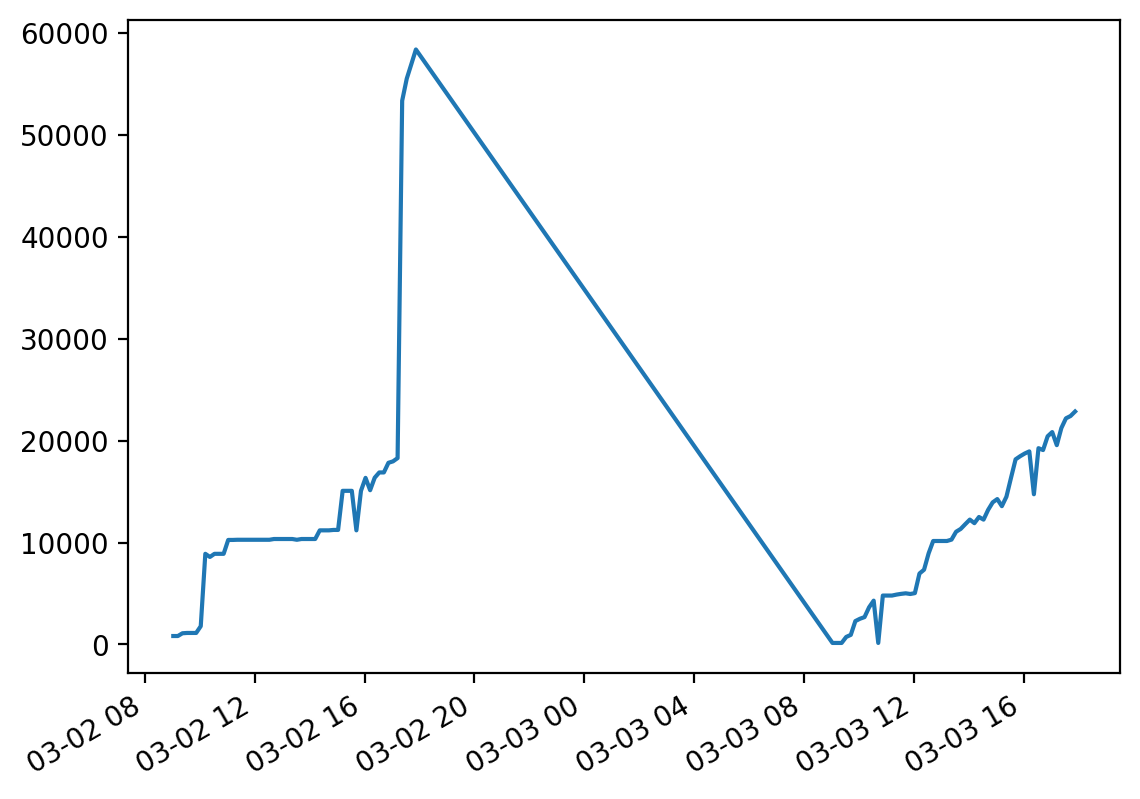

In [65]:
abivax.loc["2023-03-02": "2023-03-03", "volume"].plot()

/var/folders/gq/smvy125s6gvg8fmg2wlp7flc0000gn/T/ipykernel_18004/3837993594.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  abivax.loc["2023-03-02": "2023-03-03", "last"].plot()


<Axes: >

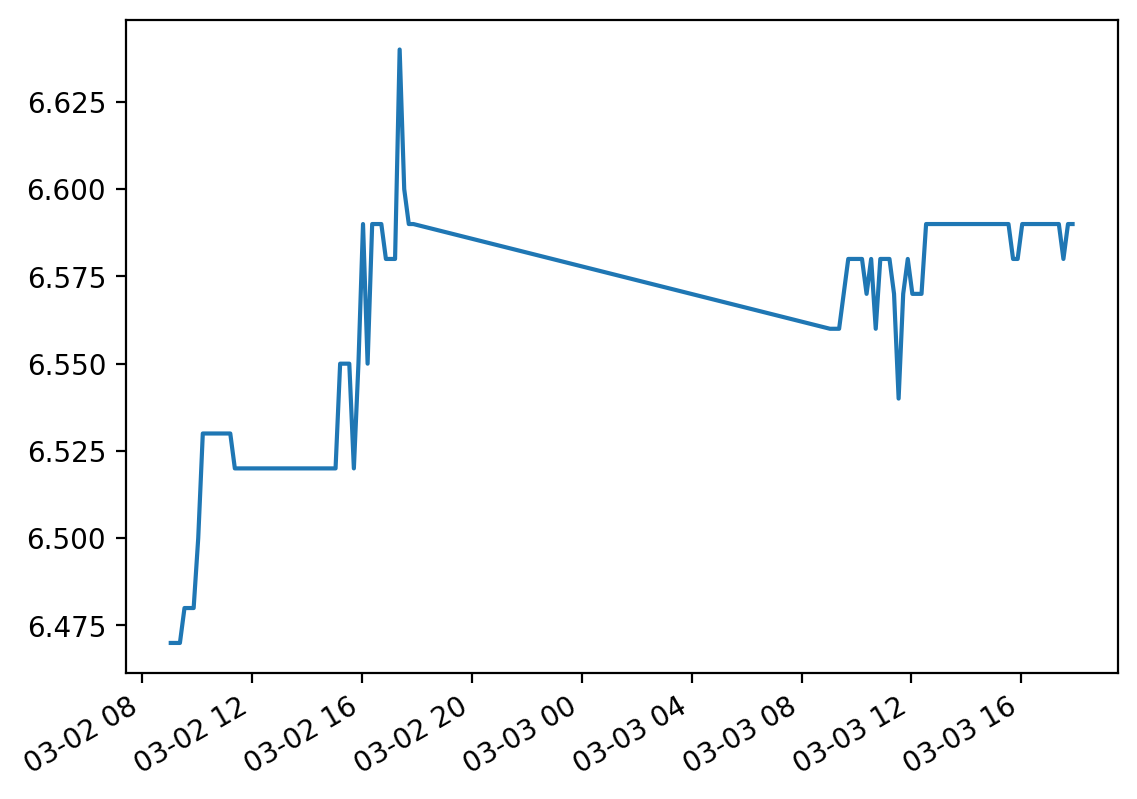

In [66]:
abivax.loc["2023-03-02": "2023-03-03", "last"].plot()

In [68]:
abivax.sort_index()
axa.loc["2023-03-02": "2023-03-03", "volume"]

2023-03-02 09:02:02.156611        0
2023-03-02 09:12:01.487764        0
2023-03-02 09:22:01.911275        0
2023-03-02 09:32:02.134285        0
2023-03-02 09:42:01.725008        0
                              ...  
2023-03-03 17:12:02.157229    11378
2023-03-03 17:22:01.323036    11378
2023-03-03 17:32:01.441334    11378
2023-03-03 17:42:01.505521    11378
2023-03-03 17:52:02.026347    11378
Name: volume, Length: 108, dtype: int64

In [70]:
for d in day_off:
    compB.drop(compB.loc[d].index, inplace=True )

In [72]:
# on ajoute la colonne des symboles en index et on la met en premier
compB = compB.set_index('symbol', append=True)
compB = compB.swaplevel(0,1).sort_index()
compB.head()

last  volume       name
symbol                                                          
1rP03227 2023-09-15 09:02:02.196706  0.000(s)       0  LATECOERE
         2023-09-15 09:12:02.202814  0.000(s)       0  LATECOERE
         2023-09-15 09:22:01.745589  0.000(s)       0  LATECOERE
         2023-09-15 09:32:01.362794  0.000(s)       0  LATECOERE
         2023-09-15 09:42:01.594774  0.000(s)       0  LATECOERE

In [75]:
compB["last"] = [str(x).split("(c)")[0] for x in compB["last"]]
compB["last"] = [str(x).split("(s)")[0] for x in compB["last"]]

In [76]:
compB['last'] = compB['last'].apply(convertion)

In [77]:
compB["last"] = compB["last"].astype("float")
print("moyenne des cours de compA: ",np.mean(compB["last"]))

moyenne des cours de compA:  127.59081379895008


<Axes: >

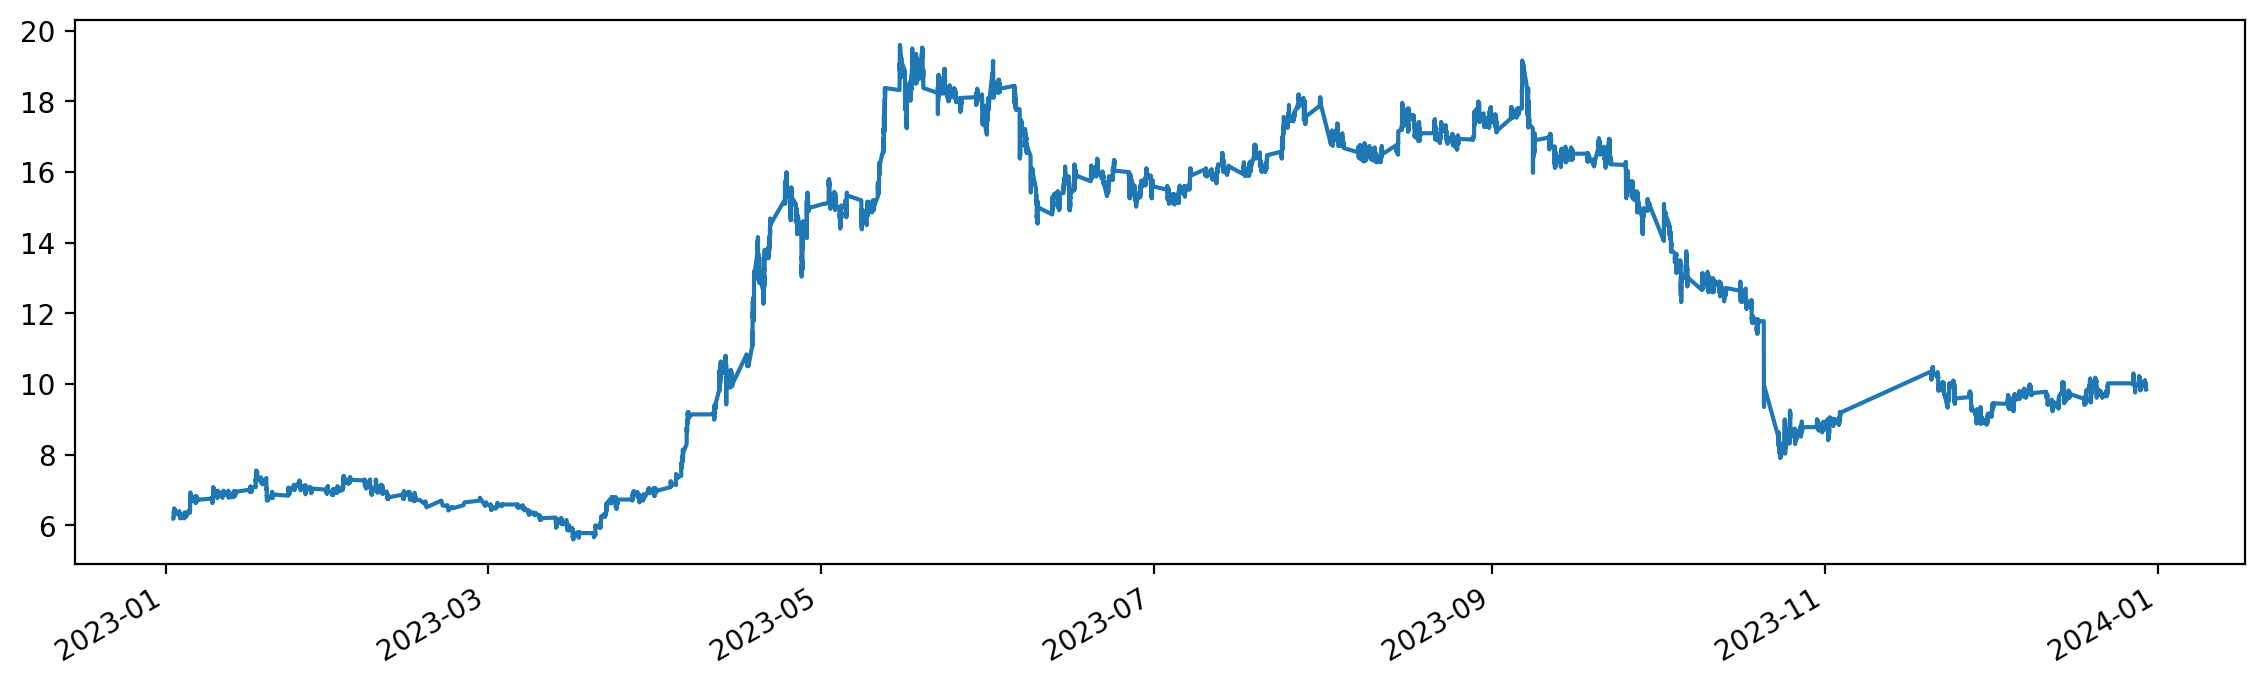

In [78]:
compB.loc['1rPABVX','last'].plot(figsize=(14,4))

<Axes: >

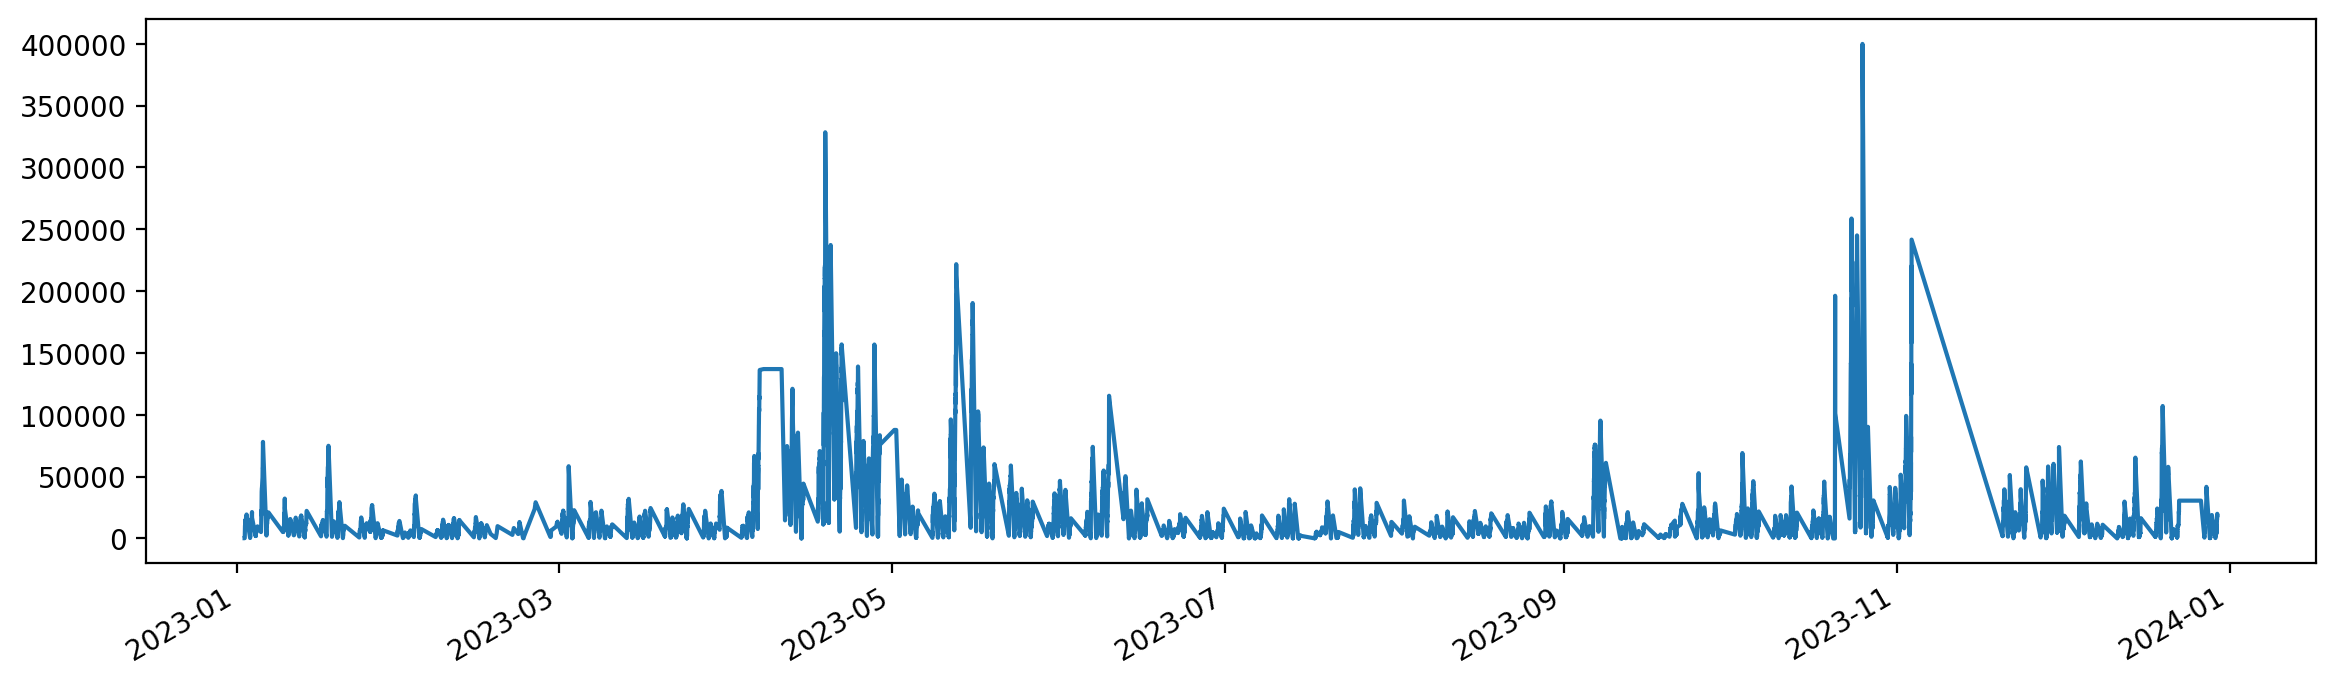

In [79]:
compB.loc['1rPABVX','volume'].plot(figsize=(14,4))